<a href="https://colab.research.google.com/github/Richardjmorton/numpyro_stuff/blob/main/numpyro_switch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpyro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 5.7 MB/s eta 0:00:00


In [2]:
!pip install funsor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 kB 4.1 MB/s eta 0:00:00


In [3]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, DiscreteHMCGibbs
import jax.numpy as jnp
from jax import random

import matplotlib.pyplot as plt

import numpy as np

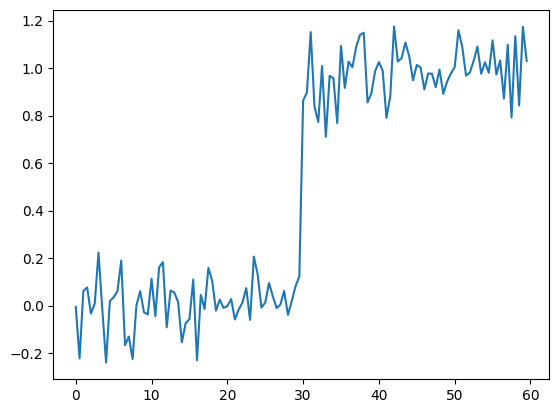

In [4]:
x = np.arange(0,60, 0.5)

y = np.zeros(len(x))
y[len(x)//2:] = 1

y += np.random.randn(len(x))*0.1
plt.plot(x,y)

In [20]:

def np_model(x, y):
  alpha = numpyro.sample('alpha', dist.Normal(0,1))
  beta = numpyro.sample('beta', dist.Normal(1,1))
  switch = numpyro.sample('switch', dist.DiscreteUniform(10,60))
  sigma =  numpyro.sample('sigma', dist.HalfNormal(0.1))

  with numpyro.plate('data', len(y)):
    mod = jnp.where(x < switch, alpha, beta)
    numpyro.sample("obs", dist.Normal(mod, sigma), obs=y)

In [21]:
rng_key = random.PRNGKey(0)

# Run NUTS.
kernel = DiscreteHMCGibbs(NUTS(np_model), modified=True)
num_samples = 100000
mcmc = MCMC(kernel, num_warmup=2000, num_samples=num_samples, num_chains=2)
mcmc.run(
    rng_key, x, y
)

mcmc.print_summary()
samples_1 = mcmc.get_samples()


<ipython-input-21-59fe31f5b8a6>:6: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(kernel, num_warmup=2000, num_samples=num_samples, num_chains=2)
sample: 100%|██████████| 102000/102000 [01:09<00:00, 1476.03it/s, 3 steps of size 9.45e-01. acc. prob=0.87]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     alpha      0.01      0.01      0.01     -0.01      0.03 230100.18      1.00
      beta      0.99      0.01      0.99      0.96      1.01 213893.61      1.00
     sigma      0.11      0.01      0.11      0.10      0.12 222425.09      1.00
    switch     30.00      0.00     30.00     30.00     30.00       nan       nan



In [10]:
import arviz as az

In [22]:
data2 = az.from_numpyro(mcmc)

In [23]:
az.summary(data2)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.011,0.014,-0.015,0.037,0.0,0.0,229766.0,155542.0,1.0
beta,0.985,0.014,0.959,1.011,0.0,0.0,214178.0,153528.0,1.0
sigma,0.107,0.007,0.094,0.121,0.0,0.0,225744.0,157553.0,1.0
switch,30.000,0.000,30.000,30.000,0.0,0.0,200000.0,200000.0,NaN


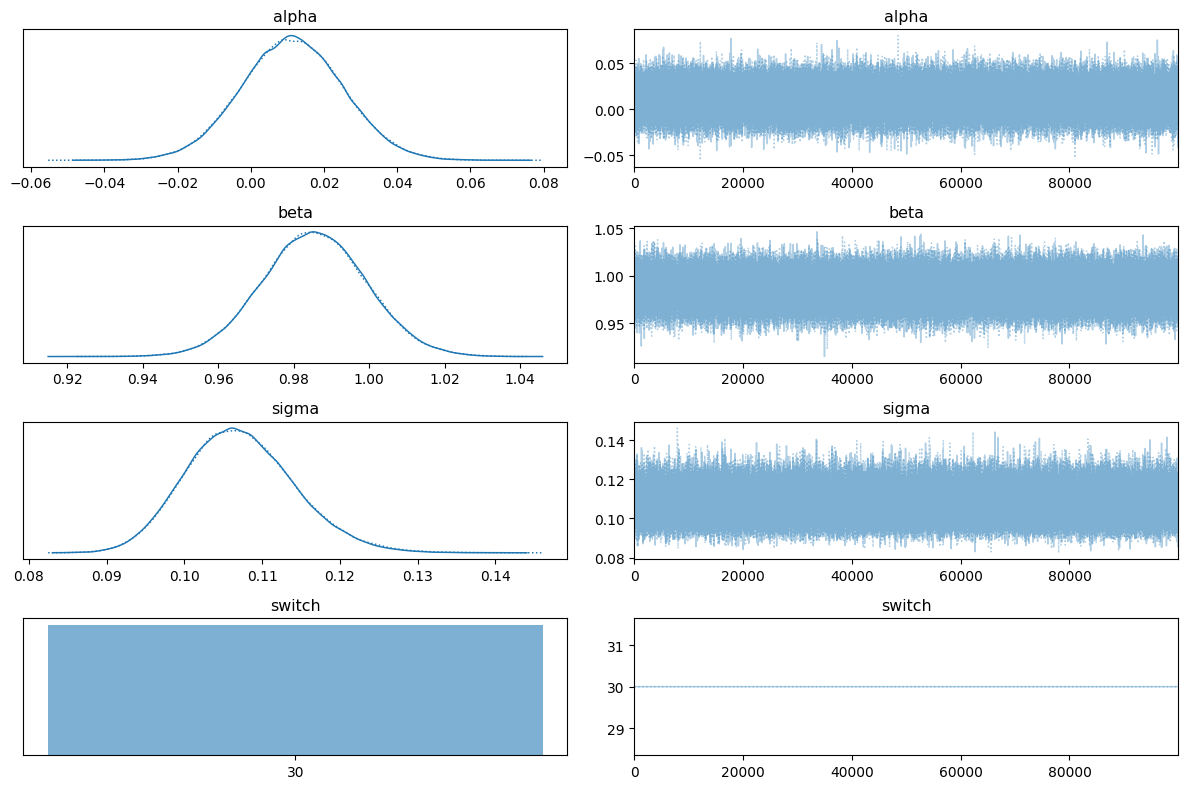

In [24]:
az.plot_trace(data2)
plt.tight_layout()

In [27]:
samples_1['switch'][0:100]

Array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],      dtype=int32)

In [38]:
dist.Disc

array([ 0.27948668,  0.02978645,  0.10973477, -0.07957367,  0.04612005,
       -0.53108076, -0.18973659, -0.26398571,  0.27165127,  0.17694065,
       -0.33420161, -0.01690252,  0.09909082,  0.21645996,  0.13211743,
        0.10465205, -0.22111289,  0.02817517,  0.02945744,  0.00277336,
       -0.08060928,  0.39234885,  0.19008105,  0.18742803,  0.04538137,
        0.13660014,  0.05587413, -0.28579751, -0.32836892,  0.1609745 ,
        0.23391757,  0.01781576, -0.42041411, -0.20196811,  0.11922032,
        0.43395634,  0.03135125, -0.10317139,  0.10229947,  0.1010181 ,
        0.05734653, -0.27853779, -0.10318207, -0.04074809,  0.148103  ,
        0.28738259,  0.15729493,  0.38138892,  0.3230907 , -0.15917386,
        0.10123169,  0.3155301 ,  0.16976379, -0.22956994,  0.22156907,
        0.22509938,  0.04439692, -0.35037607, -0.05359311,  0.12535385,
        0.53462717,  0.76870832,  1.18791138,  1.2856599 ,  0.77835291,
        1.3943198 ,  0.82284871,  0.91713554,  1.15565889,  1.21